<a href="https://colab.research.google.com/github/renatamontanhana/Vanna.AI/blob/main/AULA_01_IA_de_consulta_textual_em_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='BLUE'>CDPRO - Cientista de Dados Profissional Especialista em IA</font>

# <font color='GREY'> IA para realizar consultas em Bancos de Dados por meio de comandos textuais</font>


# Instalando e Importando a Biblioteca Python - Vanna

In [1]:
%pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
import vanna
from vanna.remote import VannaDefault

# Logar no Vanna
O Vanna oferece uma função para obter uma chave de API. Você receberá um código enviado para o seu e-mail.
Você pode salvar sua chave de API para uso futuro, assim você não precisará fazer login todas as vezes.

In [3]:
api_key = vanna.get_api_key('renatamontanhana@gmail.com')

Check your email for the code and enter it here: MAXQCX


# Base de Dados
`chinook` é amplamente utilizada para ensino e demonstrações em gestão de banco de dados, consultas SQL e modelagem de dados. Ela representa uma loja de mídia digital, incluindo tabelas para artistas, álbuns, faixas de mídia, faturas e clientes, semelhante a uma loja iTunes do mundo real [Chinook database](https://www.sqlitetutorial.net/sqlite-sample-database/)

In [4]:
vanna_model_name = 'chinook'


vn = VannaDefault(model=vanna_model_name, api_key=api_key)

# Conectando na Base de Dados
Aqui estamos nos conectando a um banco de dados SQLite, mas você pode se conectar **a qualquer** banco de dados SQL

In [5]:
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

# Vamos Fazer A Mágica Acontecer
Agora vamos usar vn.ask para fazer perguntas e isso irá gerar SQL, executar o SQL, mostrar a tabela e gerar um gráfico.

SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 3;
   ArtistId         Name  TotalSales
0        90  Iron Maiden         140
1       150           U2         107
2        50    Metallica          91


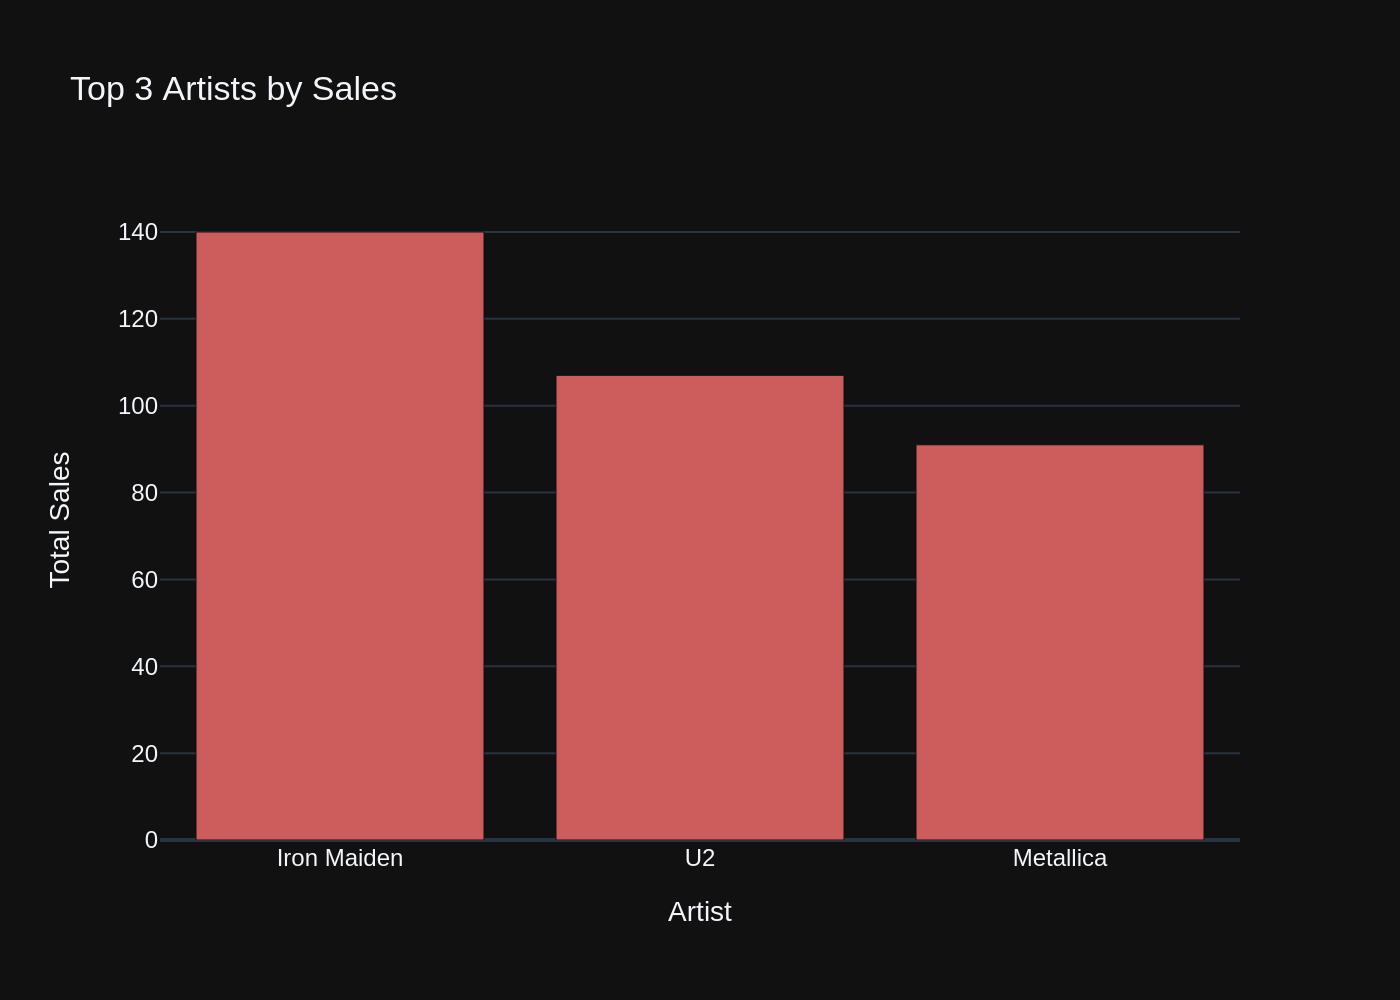

In [6]:
vn.ask("Quais são os top 3 artistas mais vendidos? ")

# Agora de acordo com as tabelas abaixo, faça uma nova pergunta

Para referência, estas são as tabelas no banco de dados.

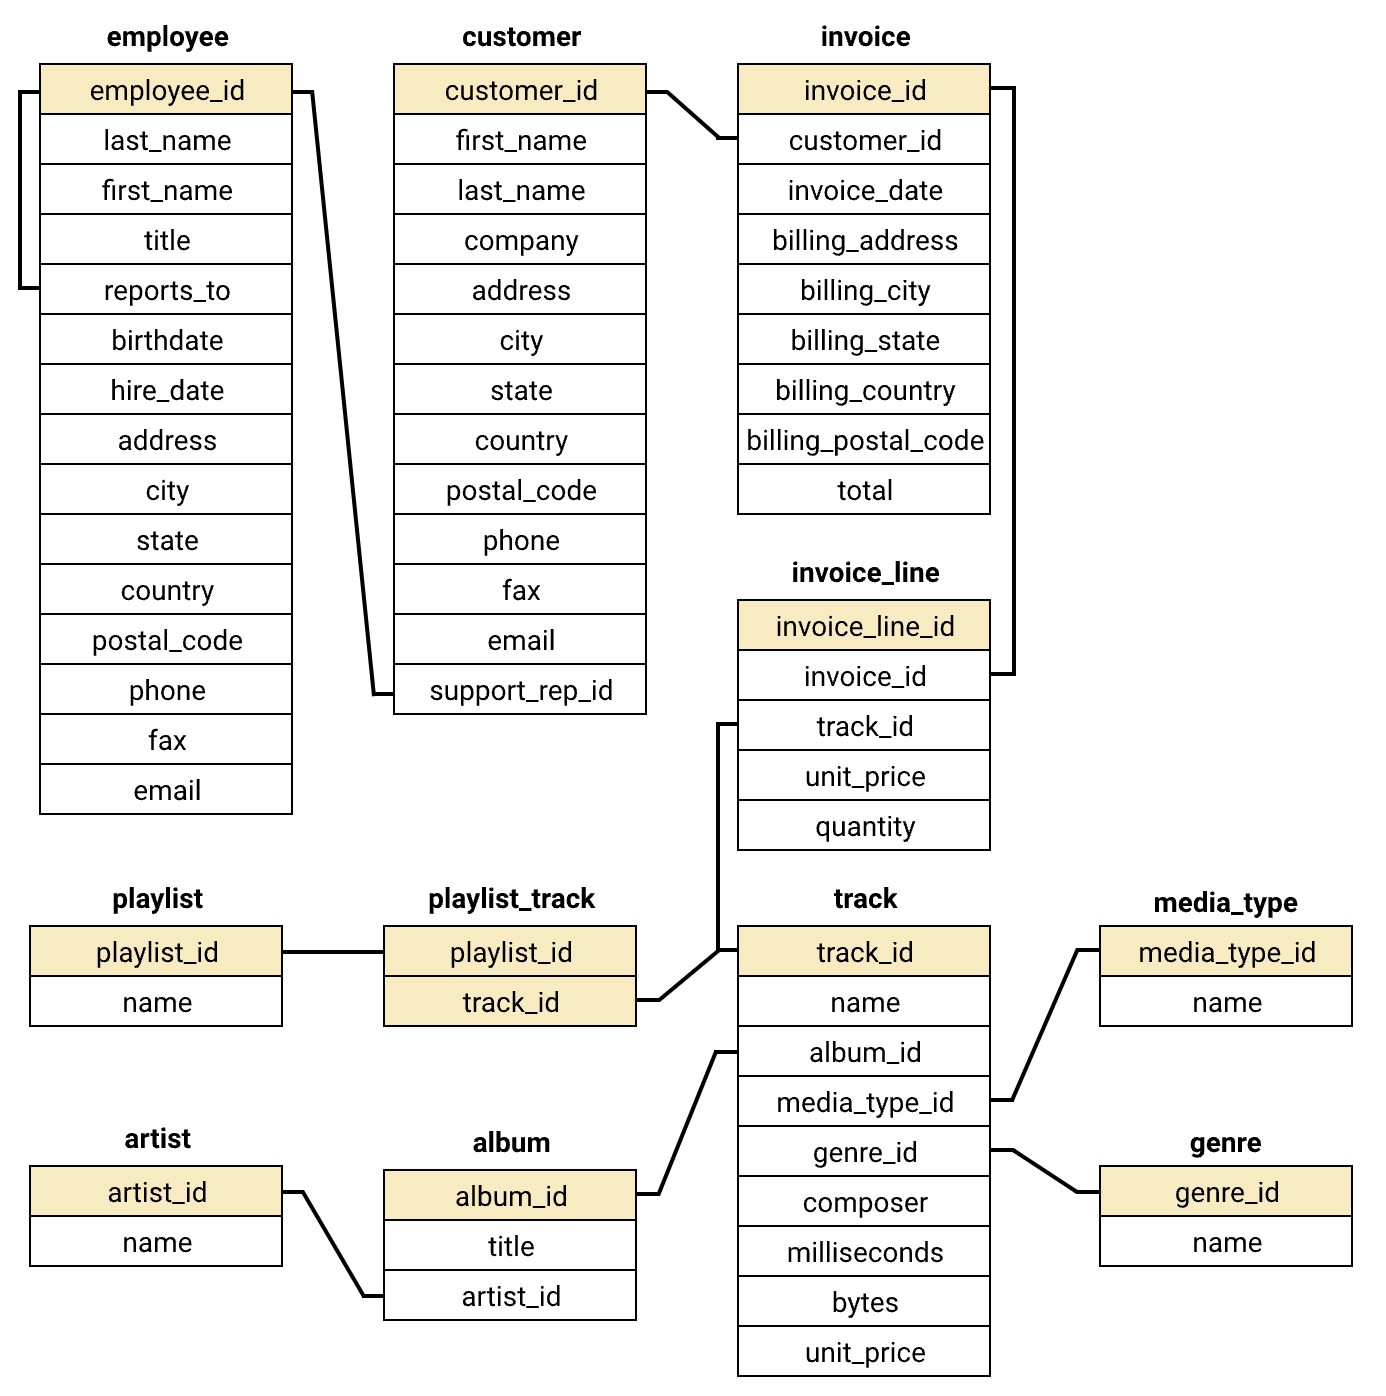

SELECT al.Title, SUM(il.Quantity) AS TotalSales
FROM Album al
JOIN Artist a ON al.ArtistId = a.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
WHERE a.Name = 'U2'
GROUP BY al.AlbumId, al.Title
ORDER BY TotalSales DESC
LIMIT 1;
            Title  TotalSales
0  Rattle And Hum          17


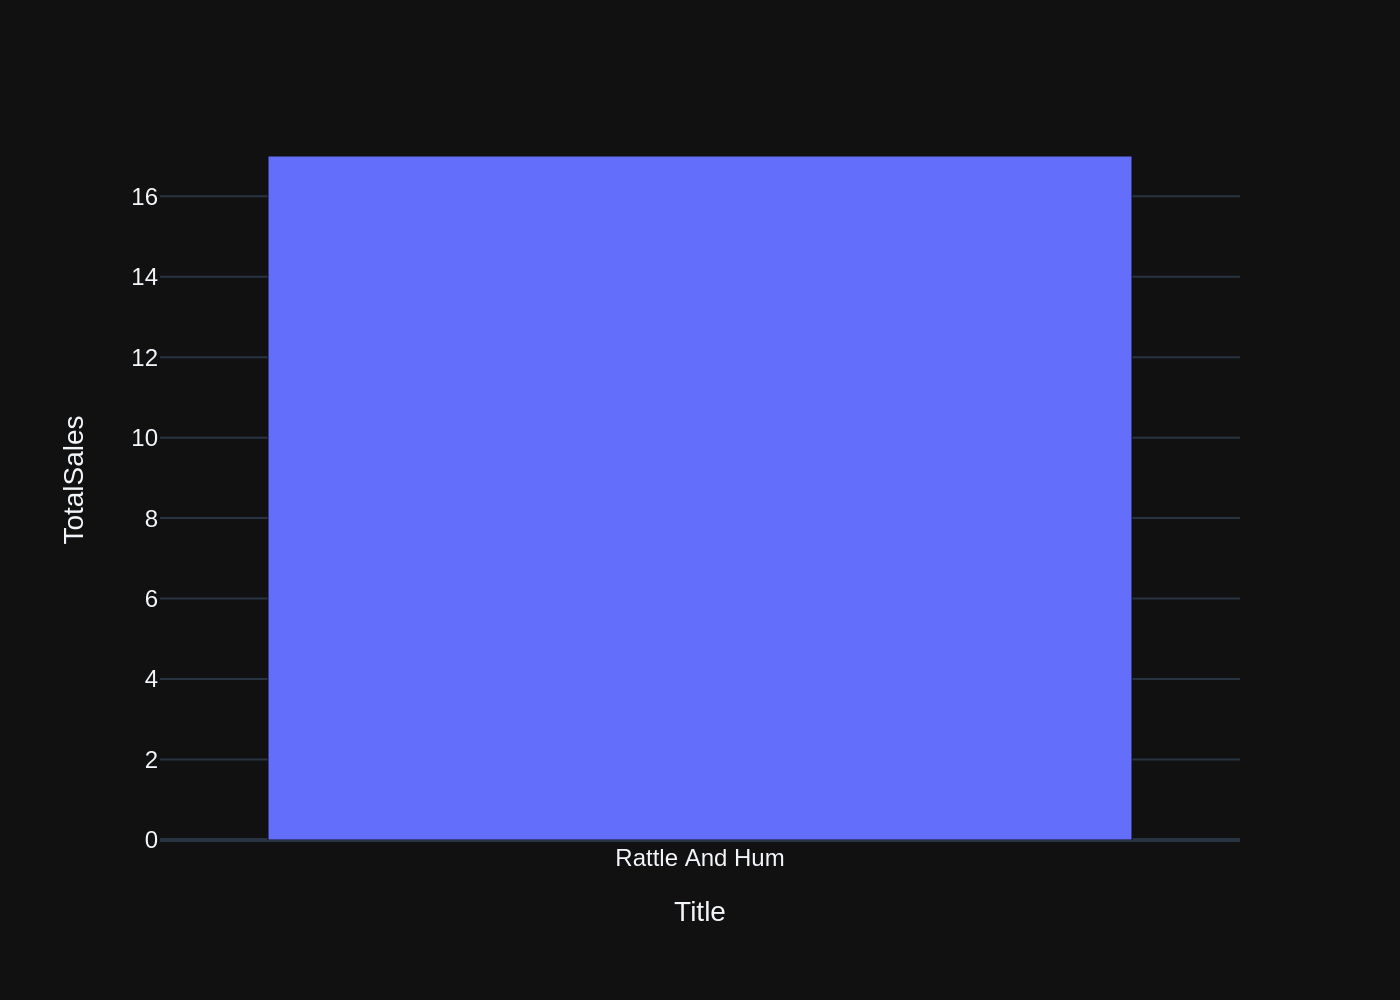

In [7]:
vn.ask('Qual o album mais comprada do U2?')

## Aplicação WEB com Flask Python
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

<IPython.core.display.Javascript object>

Your app is running at:
https://loyooveafdk-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
